In [202]:
import numpy as np

In [203]:
import pandas as pd

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [263]:
house = pd.read_csv("C:/Users/KIIT/Downloads/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [264]:
house

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [265]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [266]:
house.shape

(48895, 16)

In [267]:
house = house[house['reviews_per_month'].notnull()]
house = house[(house['price']>55) & (house['price']<900)]
house = house[house['minimum_nights']<10]
house = house[house['number_of_reviews']<60]
house = house[house['calculated_host_listings_count']<250]
house = house[house['availability_365']>40]

In [268]:
def clean(x,s):
    count = 0
    for i in range(48895):
        if (house.iloc[i,x] == s):
            count=count+1         
    print(count)

In [269]:
house.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.060000e+04,1.060000e+04,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000
mean,2.215800e+07,9.146854e+07,40.726994,-73.946492,167.502170,2.577736,17.662642,1.653969,2.536509,202.410377
std,1.097472e+07,9.085688e+07,0.058167,0.054177,127.998215,1.611765,16.167283,1.617774,4.525967,109.548220
min,2.539000e+03,2.787000e+03,40.506410,-74.244420,56.000000,1.000000,1.000000,0.010000,1.000000,41.000000
25%,1.427973e+07,9.724462e+06,40.686447,-73.982752,81.000000,1.000000,4.000000,0.460000,1.000000,90.000000
50%,2.509573e+07,5.075638e+07,40.721725,-73.952630,125.000000,2.000000,12.000000,1.060000,1.000000,184.000000
75%,3.128585e+07,1.750437e+08,40.762763,-73.928597,200.000000,3.000000,28.000000,2.380000,2.000000,313.000000
max,3.643834e+07,2.728161e+08,40.904840,-73.712990,899.000000,9.000000,59.000000,14.620000,49.000000,365.000000


In [270]:
house

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
25,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,60,1,19,2019-06-23,1.37,2,85
41,12299,Beautiful Sunny Park Slope Brooklyn,47610,Abdul,Brooklyn,South Slope,40.66278,-73.97966,Entire home/apt,120,3,15,2019-05-27,0.39,1,345
42,12303,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,25,2018-09-30,0.23,1,311
54,14322,Beautiful Apartment in Manhattan!!!,56284,Francesca,Manhattan,Kips Bay,40.73961,-73.98074,Entire home/apt,200,7,19,2019-03-25,0.22,1,257
56,14991,"Great Location, Manhattan Bedroom!",59023,Bianca,Manhattan,Lower East Side,40.72004,-73.99104,Private room,110,5,19,2019-05-18,0.17,1,301
60,15385,"Very, very cozy place",60252,Cristina,Brooklyn,Williamsburg,40.71185,-73.96204,Private room,80,2,42,2019-06-30,0.38,1,263
71,17037,Lovely EV Artist's Home,66035,Anna,Manhattan,East Village,40.72162,-73.98008,Entire home/apt,230,9,49,2018-05-14,0.43,1,116


In [271]:
house['last_review'] = pd.to_datetime(house['last_review'], errors='coerce')

In [272]:
house.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.060000e+04,1.060000e+04,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000
mean,2.215800e+07,9.146854e+07,40.726994,-73.946492,167.502170,2.577736,17.662642,1.653969,2.536509,202.410377
std,1.097472e+07,9.085688e+07,0.058167,0.054177,127.998215,1.611765,16.167283,1.617774,4.525967,109.548220
min,2.539000e+03,2.787000e+03,40.506410,-74.244420,56.000000,1.000000,1.000000,0.010000,1.000000,41.000000
25%,1.427973e+07,9.724462e+06,40.686447,-73.982752,81.000000,1.000000,4.000000,0.460000,1.000000,90.000000
50%,2.509573e+07,5.075638e+07,40.721725,-73.952630,125.000000,2.000000,12.000000,1.060000,1.000000,184.000000
75%,3.128585e+07,1.750437e+08,40.762763,-73.928597,200.000000,3.000000,28.000000,2.380000,2.000000,313.000000
max,3.643834e+07,2.728161e+08,40.904840,-73.712990,899.000000,9.000000,59.000000,14.620000,49.000000,365.000000


In [273]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 0 to 48799
Data columns (total 16 columns):
id                                10600 non-null int64
name                              10599 non-null object
host_id                           10600 non-null int64
host_name                         10599 non-null object
neighbourhood_group               10600 non-null object
neighbourhood                     10600 non-null object
latitude                          10600 non-null float64
longitude                         10600 non-null float64
room_type                         10600 non-null object
price                             10600 non-null int64
minimum_nights                    10600 non-null int64
number_of_reviews                 10600 non-null int64
last_review                       10600 non-null datetime64[ns]
reviews_per_month                 10600 non-null float64
calculated_host_listings_count    10600 non-null int64
availability_365                  10600 non-nu

In [274]:
house = house.drop_duplicates(house.columns, keep='last')
sum(house.duplicated(house.columns))

0

In [275]:
house.shape

(10600, 16)

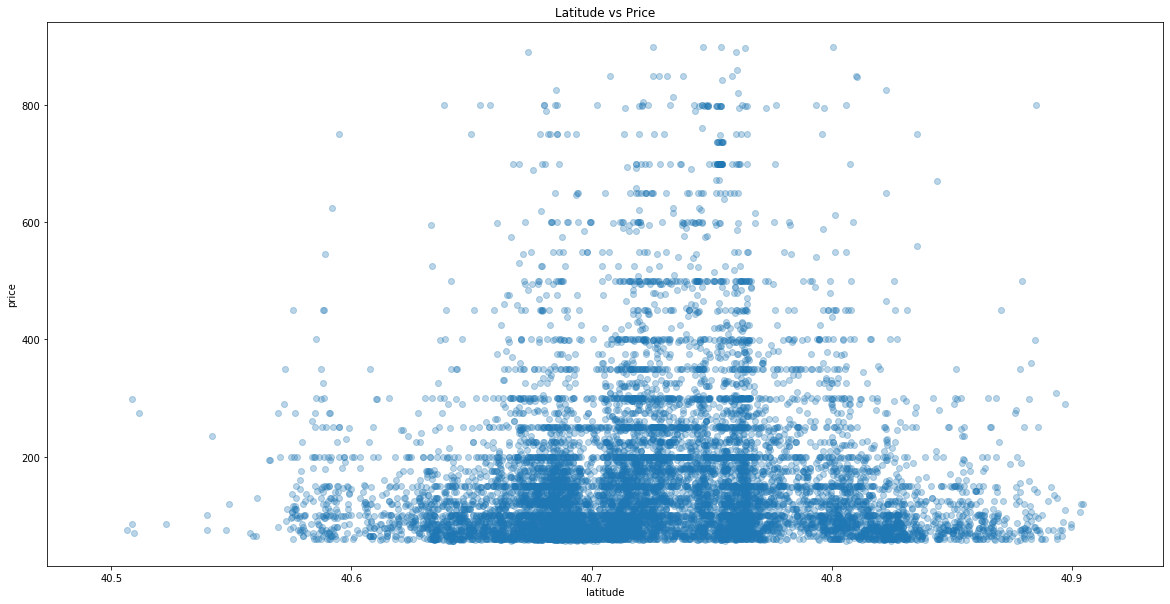

In [276]:
plt.figure(figsize=(20,10))
sns.regplot(x='latitude', y='price', data=house, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Latitude vs Price')
plt.show()

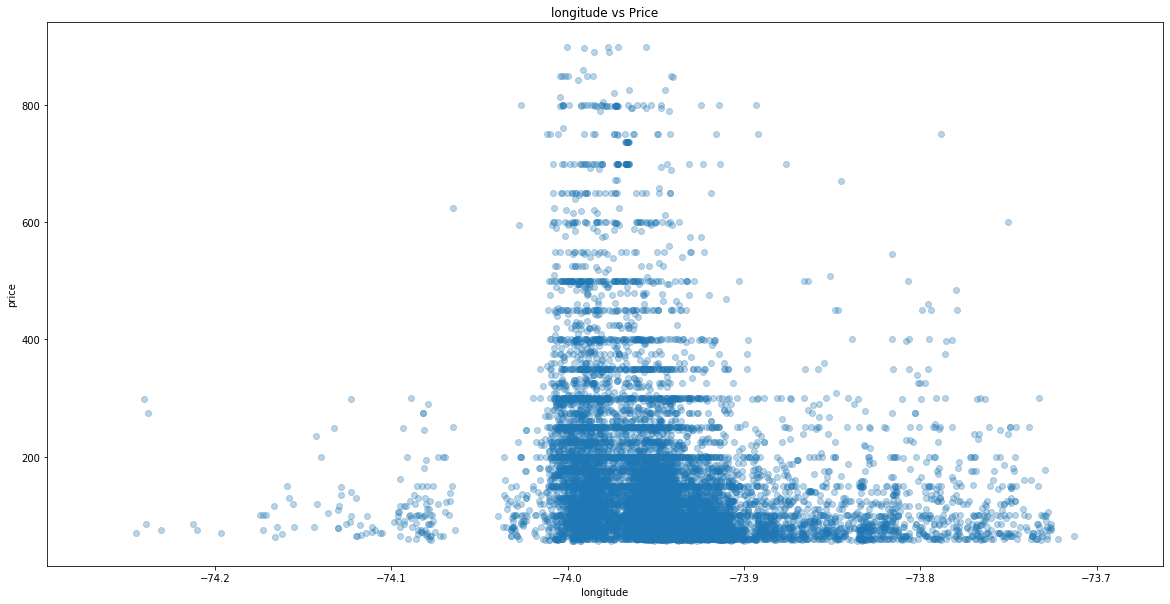

In [277]:
plt.figure(figsize=(20,10))
sns.regplot(x='longitude', y='price', data = house , fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('longitude vs Price')
plt.show()

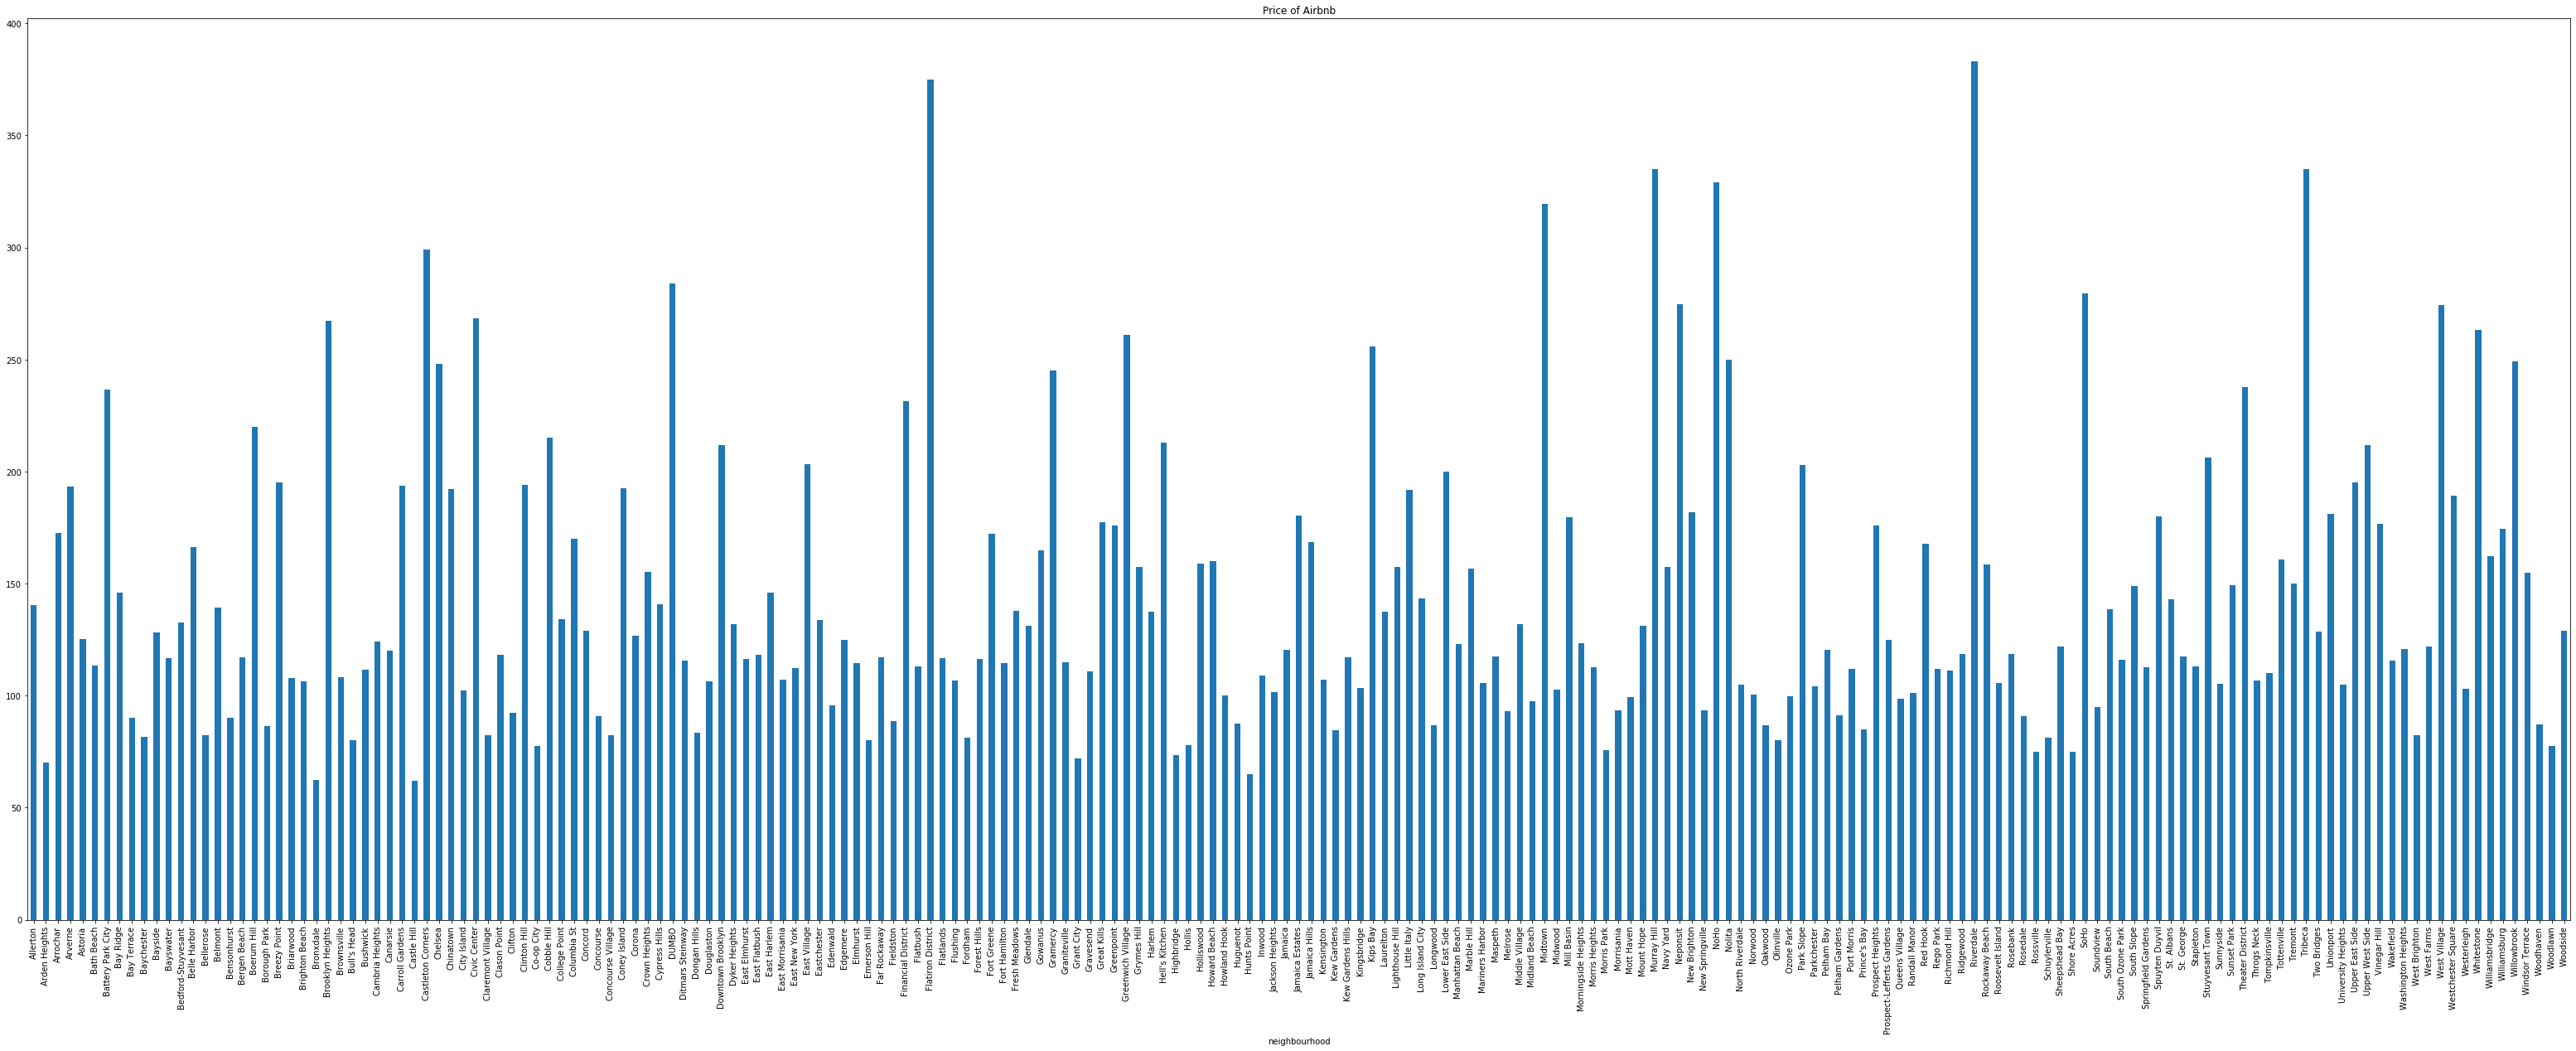

In [278]:
house.groupby('neighbourhood').mean()['price'].plot(kind = "bar", figsize=(55,20) , title="Price of Airbnb")

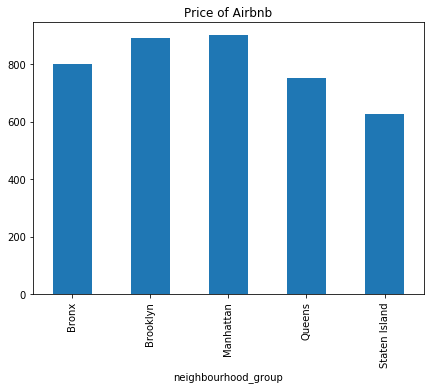

In [280]:
house.groupby('neighbourhood_group').max()['price'].plot(kind = "bar", figsize=(7,5) , title="Price of Airbnb")

In [281]:
from sklearn.preprocessing import StandardScaler

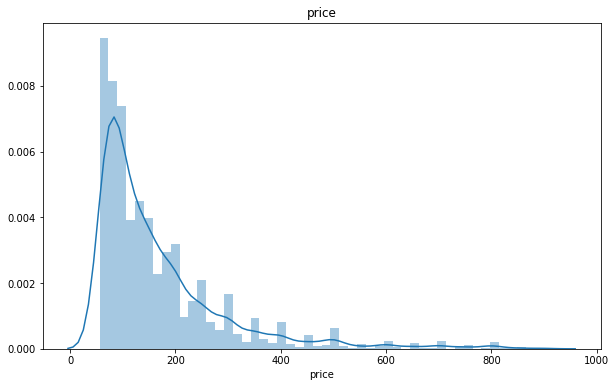

In [282]:
plt.figure(figsize=(10,6))
sns.distplot(house['price'])
plt.title('price')
plt.show()

In [283]:
house['price'] = StandardScaler().fit_transform(np.log(house['price']).to_numpy().reshape(-1,1))

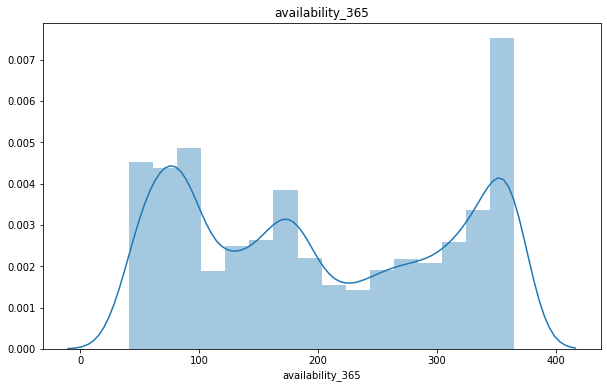

In [284]:
plt.figure(figsize=(10,6))
sns.distplot(house['availability_365'])
plt.title('availability_365')
plt.show()

In [285]:
house['availability_365'] = house['availability_365'] + 1
house['availability_365'] = StandardScaler().fit_transform(np.log(house['availability_365']).to_numpy().reshape(-1,1))

In [286]:
corr_matrix = house.corr()
corr_matrix["price"]

id                                0.013484
host_id                           0.041416
latitude                          0.053942
longitude                        -0.269040
price                             1.000000
minimum_nights                    0.115428
number_of_reviews                -0.072946
reviews_per_month                -0.017281
calculated_host_listings_count    0.022358
availability_365                  0.048456
Name: price, dtype: float64

In [287]:
house_model = house.drop(['id','host_id'],axis=1)

one_hot_features = ['neighbourhood_group', 'neighbourhood','room_type']

one_hot_encoded = pd.get_dummies(house_model[one_hot_features])

In [288]:
house_model = house_model.drop(one_hot_features, axis=1)


house_model = pd.concat([house_model, one_hot_encoded], axis=1)
house_model.head()

,name,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,John,40.64749,-73.97237,0.146478,1,9,2018-10-19,0.21,6,...,0,0,0,0,0,0,0,0,1,0
1,Skylit Midtown Castle,Jennifer,40.75362,-73.98377,0.826849,1,45,2019-05-21,0.38,2,...,0,0,0,0,0,0,0,1,0,0
22,CBG Helps Haiti Room#2.5,Lisel,40.67989,-73.97798,-0.880166,1,39,2019-01-01,0.37,6,...,0,0,0,0,0,0,0,0,1,0
25,Sunny Bedroom Across Prospect Park,Gregory,40.65599,-73.97519,-1.355063,1,19,2019-06-23,1.37,2,...,0,0,0,1,0,0,0,0,1,0
41,Beautiful Sunny Park Slope Brooklyn,Abdul,40.66278,-73.97966,-0.210838,3,15,2019-05-27,0.39,1,...,0,0,0,0,0,0,0,1,0,0


In [289]:
corr_matrix = house_model.corr()
corr_matrix["price"]

latitude                     0.053942
longitude                   -0.269040
price                        1.000000
minimum_nights               0.115428
number_of_reviews           -0.072946
                               ...   
neighbourhood_Woodlawn      -0.015753
neighbourhood_Woodside      -0.015446
room_type_Entire home/apt    0.585364
room_type_Private room      -0.564779
room_type_Shared room       -0.088941
Name: price, Length: 223, dtype: float64

In [290]:
house_model.drop(['last_review'],axis=1,inplace=True)
house_model.drop(['name'],axis=1,inplace=True)
house_model.drop(['host_name'],axis=1,inplace=True)

In [291]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

In [292]:
house_model.shape

(10600, 223)

In [293]:
training, testing = train_test_split(house_model, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(house_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 10600; training sample size = 8480, testing sample size = 2120


In [294]:
df_train_s = training.loc[:,house_model.columns]
X_train = df_train_s.drop(['price'], axis=1)
Y_train = df_train_s.loc[:, ['price']]

df_test_s = testing.loc[:,house_model.columns]
X_test = df_test_s.drop(['price'], axis=1)
Y_test = df_test_s.loc[:, ['price']]

In [295]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
24089,40.71109,-73.99616,6,42,2.13,2,0.418163,0,0,1,...,0,0,0,0,0,0,0,1,0,0
37689,40.59362,-73.95659,2,16,2.45,1,0.759192,0,1,0,...,0,0,0,0,0,0,0,1,0,0
25221,40.67118,-73.86821,1,42,1.79,1,1.115187,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22073,40.80766,-73.94342,6,2,0.09,2,-1.295479,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32912,40.63573,-74.00552,1,1,0.26,7,1.123991,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7099,40.67131,-73.94979,5,8,0.36,1,-0.542573,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4373,40.60549,-73.75547,1,13,0.21,1,0.411207,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25021,40.64351,-73.91406,1,9,0.38,4,1.052107,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36208,40.65256,-73.94185,3,2,0.24,5,0.708300,0,1,0,...,0,0,0,0,0,0,0,0,1,0
41772,40.69151,-73.96059,3,2,0.82,1,-0.608710,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [296]:
X_test

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
33700,40.66362,-73.99616,1,1,0.12,5,0.051634,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27826,40.67517,-73.95640,3,4,0.22,1,0.897420,0,1,0,...,0,0,0,0,0,0,0,0,1,0
20185,40.75228,-73.97185,2,1,0.03,12,1.188467,0,0,1,...,0,0,0,0,0,0,0,0,1,0
20246,40.74396,-73.87476,1,8,0.26,1,0.897420,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42851,40.69008,-73.78667,2,12,3.56,3,1.033599,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4947,40.66123,-73.93428,3,37,0.62,1,0.937572,0,1,0,...,0,0,0,0,0,0,0,1,0,0
47252,40.71708,-73.82411,1,10,10.00,1,-0.076836,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48036,40.62351,-73.95509,1,2,2.00,3,1.033599,0,1,0,...,0,0,0,0,0,0,0,0,1,0
45111,40.70517,-73.94288,1,2,1.00,3,-0.972924,0,1,0,...,0,1,0,0,0,0,0,0,1,0
23579,40.74842,-73.98542,1,1,0.10,1,0.095038,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [297]:
Y_train

,price
24089,0.101557
37689,-0.354473
25221,-0.819395
22073,2.700437
32912,-1.355063
7099,0.157520
4373,-1.100596
25021,-0.704178
36208,-1.100596
41772,-0.210838


In [298]:
Y_test

,price
33700,1.459080
27826,-1.355063
20185,2.918801
20246,-1.100596
42851,-0.780089
4947,-0.780089
47252,-1.008863
48036,-0.210838
45111,-0.143450
23579,1.408283


In [299]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
l.predict(X_test)

array([[ 0.4932785 ],
       [-0.61195374],
       [ 0.49210358],
       ...,
       [ 0.11562347],
       [ 0.30223846],
       [-0.41555786]])

In [301]:
from sklearn.model_selection import cross_val_score
cv_scores_linreg = cross_val_score(l, X_train, Y_train, cv=2)
cv_scores_linreg

array([-1.26993043e+17, -1.88355308e+18])

In [302]:
from sklearn.metrics import mean_squared_error
housing_predictions = l.predict(X_test)
mse = mean_squared_error(Y_test,housing_predictions)
rmse = np.sqrt(mse)
rmse

#High error , maybe overfitting of data ,so we need to regularize the model and thus we use Ridge Regression

158889495.3735172

In [303]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [304]:
r.predict(X_test)

array([[ 0.5113193 ],
       [-0.64472793],
       [ 0.50650238],
       ...,
       [ 0.18096163],
       [ 0.30290999],
       [-0.41668385]])

In [305]:
from sklearn.metrics import mean_squared_error
housing_predictions = r.predict(X_test)
mse = mean_squared_error(Y_test,housing_predictions)
rmse = np.sqrt(mse)
rmse

0.7131533473872571

In [306]:
from sklearn.model_selection import cross_val_score
cv_scores_linreg = cross_val_score(r, X_train, Y_train, cv=2)
cv_scores_linreg

array([0.51573212, 0.50257073])

In [307]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [308]:
housing_predictions = tree_reg.predict(X_test)


In [309]:
cv_scores_linreg = cross_val_score(tree_reg, X_train, Y_train, cv=5)
cv_scores_linreg

array([0.17378152, 0.18174707, 0.15104714, 0.14623405, 0.1584767 ])

In [310]:
tree_mse = mean_squared_error(Y_test,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.8954012993213616

In [410]:
# Ridge Regression and Decision Tree gave us good results with minute error while Linear Regression 
#on the other hand failed to provide satisfactory results for this data set